In [2]:
#Imports

#Import linear algebra and data manipulation
import numpy as np
import pandas as pd
#import datetime

#Import plotting packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Import machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#import xgboost

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics


## Part I Business Understanding:

Are you interested in visiting the beautiful emerald city -- Seattle but don't know how to start? When is the best time to visit and enjoy the beautiful scenaries the city has to offer? How to find an accomodation within your budget? Fortunately, with the help of online platforms as well as mobile based apps, it is much easier to find and compare information to make a informed decision. Airbnb is gaining its popularity as a new way of traveling comparing to the traditional hotel stay. Using the Seattle airbnb data, we will hopefully help you overcome some of the challenges in your trip planning.

## Part II Data Understanding:

We are looking at all the data collected in year 2016 from all Seattle listings, which is a total number of 3118 listings provided by 2751 hosts. The listings are from all of Seattle's 17 neighbourhoods.

In [6]:
# import the data set
listing = pd.read_csv('./listings.csv')
calendar = pd.read_csv('./calendar.csv')
reviews = pd.read_csv('./reviews.csv')

In [7]:
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [8]:
#find number of listings and number of hosts
listings_number = listing['id'].count()
hosts_number = len(listing['host_id'].unique())

print('The dataset contains a total number of {} listings provided by {} hosts'.format(listings_number, hosts_number))

The dataset contains a total number of 3818 listings provided by 2751 hosts


In [9]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [10]:
listing['price']

0        $85.00
1       $150.00
2       $975.00
3       $100.00
4       $450.00
         ...   
3813    $359.00
3814     $79.00
3815     $93.00
3816     $99.00
3817     $87.00
Name: price, Length: 3818, dtype: object

In [11]:
neighbourhood_list = listing['neighbourhood_group_cleansed'].unique()
len(neighbourhood_list)

17

In [12]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [13]:
data_start = calendar['date'].min()
data_end = calendar['date'].max()
print('The first data observations is {} and the last data observation is {}'.format(data_start, data_end))

The first data observations is 2016-01-04 and the last data observation is 2017-01-02


In [14]:
calendar.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


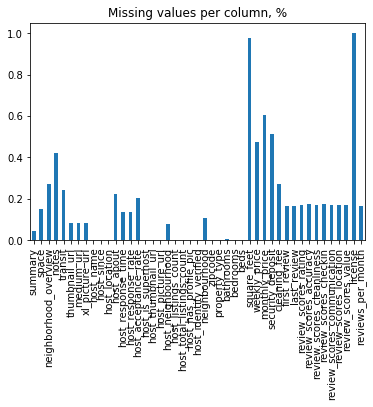

In [15]:
#find percentage of missing values for each column
listings_missing = listing.isnull().mean()

#filter out only columns, which have missing values
listings_columns_with_nan = listings_missing[listings_missing > 0]

#plot the results
listings_columns_with_nan.plot.bar(title='Missing values per column, %')

In [16]:
listings_columns_with_nan.sort_values(ascending = False)

license                        1.000000
square_feet                    0.974594
monthly_price                  0.602672
security_deposit               0.511262
weekly_price                   0.473808
notes                          0.420639
neighborhood_overview          0.270299
cleaning_fee                   0.269775
transit                        0.244631
host_about                     0.224987
host_acceptance_rate           0.202462
review_scores_accuracy         0.172342
review_scores_checkin          0.172342
review_scores_value            0.171818
review_scores_location         0.171556
review_scores_cleanliness      0.171032
review_scores_communication    0.170508
review_scores_rating           0.169460
reviews_per_month              0.164222
first_review                   0.164222
last_review                    0.164222
space                          0.149031
host_response_time             0.136983
host_response_rate             0.136983
neighbourhood                  0.108958


From the above, most of the missing information are areound host information or reviews, which are not needed for our analysis. We are also missing a lot of information on square-feet of the property, weekly and monthly prices. We will use the price information from the calendar dataset instead. 

In [17]:
#find percentage of missing values for each column
calendar.isnull().mean()

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

In [18]:
calendar.shape[0]

1393570

Out of 1393570 records, We are missing about 33% of pricing information from the calendar dataset. The remaing 77% will still make a large population.

## Part III Data Preparation

Before moving into data analysis, we will prepare and clean the data. We will do the following:
1. listing and calendar datasets will be mergered based on listing_id so that the pricing information (response) can be used for analysis;
2. Remove irrelevant columns;
3. fill columns with missing values with applicable mean or mode;
4. standardize data in good format (i.e., dates and prices should be converted from text into numbers.)

In [19]:
listing = listing.rename(index=str, columns={"id": "listing_id", "price": "listing_price"})

In [20]:
#Main dataset cleaning function
def clean_dataset(df1, df2, merge_field ='listing_id'):
    '''
    INPUT
    df1 - pandas dataframe containing listings data 
    df2 - pandas dataframe containing calendar data
    merge_field - the field that joints df1 and df2
    
    OUTPUT
    df - cleaned dataset, which contains merged tables:
    1. select columns needed for analysis purposes;
    2. string containing dates are converted into numbers;
    3. missing values are imputed with mean or mode.
    '''
    #merge datasets
    df = pd.merge(df1, df2, on = merge_field)
    
    #select columns that are needed for analysis purposes
    var = ['listing_id','neighbourhood_group_cleansed', 'latitude', 'longitude','bathrooms', 'bedrooms', 
           'beds', 'bed_type', 'amenities','price','listing_price','available','number_of_reviews','review_scores_value','date']
    
    df = df.loc[:, df.columns.isin(var)]
    
    #convert dates to datetime format
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df.date.dt.month
    df['year'] = df.date.dt.year
    df['day'] = df.date.dt.day
    
    #remove rows where price info is missing given that price will be our responses
    df = df.dropna(subset=['price'])
    
    #convert price from string to float
    cur_to_num = lambda x: str(x).replace('$', '').replace(',', '')
    df['price']= pd.to_numeric(df['price'].apply(cur_to_num))
    df['listing_price']= pd.to_numeric(df['listing_price'].apply(cur_to_num))
    #fill missing values with mean or mode
    fill_mean = lambda col: col.fillna(col.mean())
    
    return df

In [21]:
df = clean_dataset(listing, calendar)
df.head()

,listing_id,neighbourhood_group_cleansed,latitude,longitude,bathrooms,bedrooms,beds,bed_type,amenities,listing_price,number_of_reviews,review_scores_value,date,available,price,month,year,day
0,241032,Queen Anne,47.636289,-122.371025,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,207,10.0,2016-01-04,t,85.0,1,2016,4
1,241032,Queen Anne,47.636289,-122.371025,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,207,10.0,2016-01-05,t,85.0,1,2016,5
9,241032,Queen Anne,47.636289,-122.371025,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,207,10.0,2016-01-13,t,85.0,1,2016,13
10,241032,Queen Anne,47.636289,-122.371025,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,207,10.0,2016-01-14,t,85.0,1,2016,14
14,241032,Queen Anne,47.636289,-122.371025,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,207,10.0,2016-01-18,t,85.0,1,2016,18


In [22]:
df.isnull().mean()

listing_id                      0.000000
neighbourhood_group_cleansed    0.000000
latitude                        0.000000
longitude                       0.000000
bathrooms                       0.005139
bedrooms                        0.002143
beds                            0.000391
bed_type                        0.000000
amenities                       0.000000
listing_price                   0.000000
number_of_reviews               0.000000
review_scores_value             0.156348
date                            0.000000
available                       0.000000
price                           0.000000
month                           0.000000
year                            0.000000
day                             0.000000
dtype: float64

Given that the columns bathrooms and bedrooms have a small percentage of information missing and will not have a big impact on the analysis, I will drop these missing rows. For review_scores_value, we will fill the missing values with the mode.

In [23]:
df = df.dropna(subset=['bathrooms', 'bedrooms', 'beds'])

In [24]:
df['review_scores_value'].fillna(df['review_scores_value'].mean(), inplace = True)

In [25]:
df.isnull().mean()

listing_id                      0.0
neighbourhood_group_cleansed    0.0
latitude                        0.0
longitude                       0.0
bathrooms                       0.0
bedrooms                        0.0
beds                            0.0
bed_type                        0.0
amenities                       0.0
listing_price                   0.0
number_of_reviews               0.0
review_scores_value             0.0
date                            0.0
available                       0.0
price                           0.0
month                           0.0
year                            0.0
day                             0.0
dtype: float64

In [26]:
df.describe()

,listing_id,latitude,longitude,bathrooms,bedrooms,beds,listing_price,number_of_reviews,review_scores_value,price,month,year,day
count,9.277360e+05,927736.000000,927736.000000,927736.000000,927736.000000,927736.000000,927736.000000,927736.000000,927736.000000,927736.000000,927736.000000,927736.000000,927736.000000
mean,5.339968e+06,47.628901,-122.333241,1.259315,1.285719,1.731739,127.328992,23.929719,9.429021,137.968139,6.662703,2016.006104,15.875999
std,2.957591e+06,0.043919,0.032386,0.583076,0.849636,1.155534,90.810373,39.590224,0.679532,105.281748,3.446498,0.077890,8.814058
min,3.335000e+03,47.505088,-122.417219,0.000000,0.000000,1.000000,20.000000,0.000000,2.000000,10.000000,1.000000,2016.000000,1.000000
25%,2.944021e+06,47.608546,-122.355420,1.000000,1.000000,1.000000,75.000000,2.000000,9.000000,75.000000,4.000000,2016.000000,8.000000
50%,5.651254e+06,47.623922,-122.329121,1.000000,1.000000,1.000000,100.000000,10.000000,9.429021,109.000000,7.000000,2016.000000,16.000000
75%,7.886656e+06,47.663218,-122.309943,1.000000,2.000000,2.000000,150.000000,28.000000,10.000000,160.000000,10.000000,2016.000000,24.000000
max,1.034016e+07,47.733358,-122.240607,8.000000,7.000000,15.000000,1000.000000,474.000000,10.000000,1650.000000,12.000000,2017.000000,31.000000


Now we have the final clean dataset for us to run some analysis. 

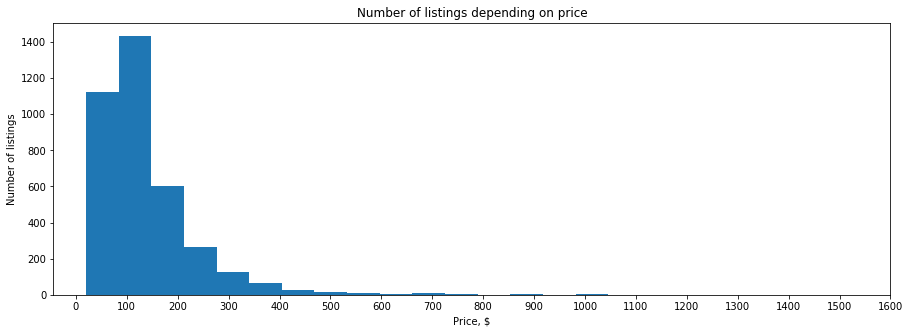

In [27]:
#get the average price for each listing
mean_price_for_listing = df.groupby('listing_id').mean()['price']

#plot
plt.figure(figsize=(15,5))
plt.hist(mean_price_for_listing, bins=20)
plt.xticks(np.arange(0, 1700, step=100))
plt.ylabel('Number of listings')
plt.xlabel('Price, $')
plt.title('Number of listings depending on price')


plt.show()

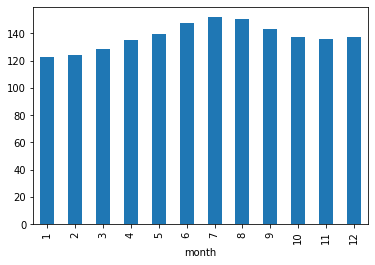

In [29]:
#get the average price for each month
average_monthly_price = df.groupby('month').mean()['price']

#plot
average_monthly_price.plot(kind='bar')

plt.show()

In [30]:
max_price = df['price'].max()
min_price = df['price'].min()
avg_price = df['price'].mean()
print('The listing price ranges from {} to {}'.format(min_price, max_price))
print('The average price is {}'.format(avg_price))

The listing price ranges from 10.0 to 1650.0
The average price is 137.9681385652815


We are looking at all the data collected in year 2016 from all Seattle listings, which is a total number of 3118 listings provided by 2751 hosts. The listings are from all of Seattle's 17 neighbourhoods.

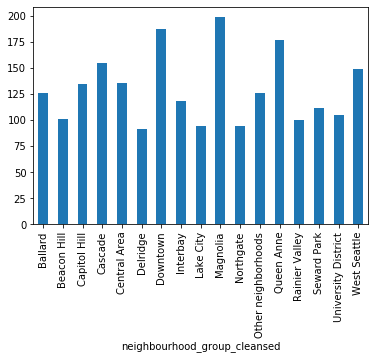

In [32]:
average_price_neighbourhood = df.groupby('neighbourhood_group_cleansed').mean()['price']

#plot
average_price_neighbourhood.plot(kind='bar')

plt.show()

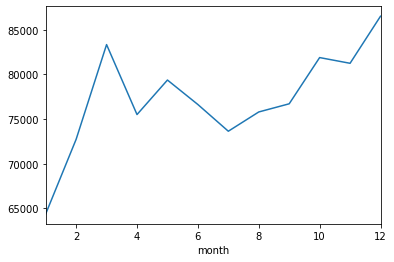

In [34]:
average_monthly_listing = df.groupby(df['month']).count()['listing_id']

#plot
average_monthly_listing.plot(kind='line')

plt.show()

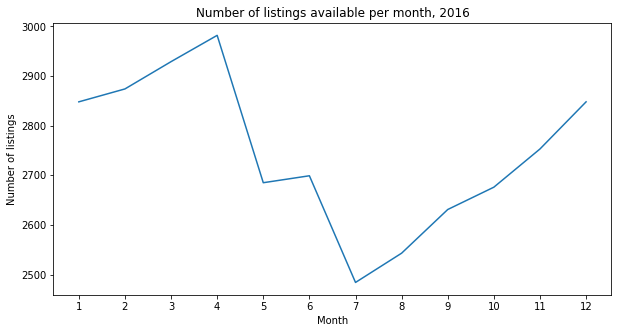

In [39]:
number_of_listings_by_month = pd.Series([12])
for i in range(1, 13):
    number_of_listings_by_month[i] = len(df[(df['month'] == i) & (df['year'] == 2016)]['listing_id'].unique())
    
number_of_listings_by_month = number_of_listings_by_month.drop(0)

#plot
plt.figure(figsize=(10,5))
plt.plot(number_of_listings_by_month)
plt.xticks(np.arange(1, 13, step=1))
plt.ylabel('Number of listings')
plt.xlabel('Month')
plt.title('Number of listings available per month, 2016')

plt.savefig('number of available listings.png')

plt.show()

The above graph shows that the number of listings availale was the lowest around the summer months, June, July and August. This is probably also indicative that the summer months are the most popular times to visit Seattle, where we see rising listing prices and fewer availabilities.

In [ ]:
cols = ['accommodates','bathrooms','bedrooms','beds','host_since_year',
        'host_listings_count', 'extra_people_fee',
        'review_scores_rating', 'price']

#Find out correlation between columns and plot
corrs = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(7,7)})
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = cols, xticklabels = cols).set_title('Correlations heatmap')

fig = hm.get_figure()


Next, we will apply machine learning to help predict the price. 

In [ ]:
#Split into explanatory and response variables
X = df.drop(price, axis=1)
y = df[price]

test_size = 0.3
rand_state = 42

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)


test_size = len(y_test)

"The r-squared score for the model using only quantitative variables was {} on {} values.".format(test_score, test_size)